<a href="https://colab.research.google.com/github/brit228/AB-Demo/blob/master/module2-Bag-of-Words/LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

In [80]:
import requests
from bs4 import BeautifulSoup


addition = ""
i = 0
data = []
while True:
  r = requests.get("https://www.indeed.com/jobs?q=data%20scientist&l=Boston,%20MA"+addition)
  soup = BeautifulSoup(r.text, 'html.parser')
  for card in soup.find_all('div', class_="jobsearch-SerpJobCard", attrs={"data-tn-component": "organicJob"}):
    try:
      d = {}
      d["Job Title"] = card.h2.a.text
      d["Company"] = card.find("span", class_="company").text.strip()
      d["Location"] = card.find("span", class_="location").text.strip()
      r2 = requests.get("https://www.indeed.com"+card.a["href"])
      soup2 = BeautifulSoup(r2.text, 'html.parser')
      d["Job Description"] = "\n".join([a.text for a in soup2.find("div", class_="jobsearch-JobComponent-description icl-u-xs-mt--md").contents])
      data.append(d)
    except:
      pass
  i += 10
  print(i)
  addition = "&start={}".format(i)
  if len(data) > 100:
    break
df = pd.DataFrame(data)
df

Who we are
Massachusetts Cannabis Research Laboratories (MCR Labs) is a rapidly growing, independent, and accredited cannabis testing and analytics laboratory.
We are a team of researchers, analytical chemists, pharmaceutical scientists, technologists, and cannabis enthusiasts working to advance the medical and recreational cannabis industries by helping providers ensure the safety and effectiveness of their products. We are committed to proving the best possible services to our clients, building relationships and supporting our community.
This is an exceptional career opportunity to join the team of a fast-paced company in a high-growth industry!
Job Summary
This position is responsible for the production of reports, extracting and analyzing output from internal software tool for client testing reports, and performing internal trend analysis.
Primary Job Responsibilities: 
The position will be responsible for creating and running various reports from the internal software. Review and 

,Company,Job Description,Job Title,Location
0,W.R. Berkley,Internship\nCompany Details\nBerkley Prime Tra...,Actuarial/Data Scientist Intern,"Boston, MA"
1,Vistaprint,"At Vistaprint, we believe that everything we d...",Senior Data Scientist,"Boston, MA"
2,Avancer Corporation,Job Summary\nJob Title: Data Scientist\nJob Lo...,Data Scientist,"Marlborough, MA"
3,Steward Health Care,\nDescription\nA rare opportunity to join the ...,Data Scientist,"Dedham, MA 02026"
4,Microsoft,"A new technology paradigm is emerging, one wit...",Full Time opportunities for students & recent ...,"Cambridge, MA 02142 (East Cambridge area)"
5,Brigham & Women's Hospital(BWH),\nThe Data Scientist will work autonomously an...,DATA SCIENTIST/ 40 HOURS/ DAYS/ BWH SLEEP MEDI...,"Boston, MA"
6,Boston Medical Center (BMC),Boston Medical Center Health System is a $2.6B...,Data Scientist,"Boston, MA 02118 (South Boston area)"
7,Rapid7,Job Overview\nWe are looking for a highly moti...,"Data Scientist, Business Intelligence","Boston, MA 02116 (South End area)"
8,Santander Bank,Sr. Data Scientist-1901744\nDescription\nThe S...,Sr. Data Scientist,"Boston, MA"
9,ENGIE Insight,"Part-time, Internship\n\nENGIE Insight, former...",Associate Data Scientist - INTERNSHIP,"Boston, MA"


10
20
30
40
50
60
70
80
90
100
110
120
130
140


,Company,Job Description,Job Title,Location
0,W.R. Berkley,Internship\nCompany Details\nBerkley Prime Tra...,Actuarial/Data Scientist Intern,"Boston, MA"
1,Vistaprint,"At Vistaprint, we believe that everything we d...",Senior Data Scientist,"Boston, MA"
2,Avancer Corporation,Job Summary\nJob Title: Data Scientist\nJob Lo...,Data Scientist,"Marlborough, MA"
3,Steward Health Care,\nDescription\nA rare opportunity to join the ...,Data Scientist,"Dedham, MA 02026"
4,Microsoft,"A new technology paradigm is emerging, one wit...",Full Time opportunities for students & recent ...,"Cambridge, MA 02142 (East Cambridge area)"
5,Brigham & Women's Hospital(BWH),\nThe Data Scientist will work autonomously an...,DATA SCIENTIST/ 40 HOURS/ DAYS/ BWH SLEEP MEDI...,"Boston, MA"
6,Boston Medical Center (BMC),Boston Medical Center Health System is a $2.6B...,Data Scientist,"Boston, MA 02118 (South Boston area)"
7,Rapid7,Job Overview\nWe are looking for a highly moti...,"Data Scientist, Business Intelligence","Boston, MA 02116 (South End area)"
8,Santander Bank,Sr. Data Scientist-1901744\nDescription\nThe S...,Sr. Data Scientist,"Boston, MA"
9,Liberty Mutual Insurance,"Temporary, Internship\nData Science Graduate L...",Data Science Graduate Internship - Summer 2019,"Boston, MA 02101"


# 2) Use NLTK to tokenize / clean the listings 

In [81]:
df2 = df.copy()
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
df2["Job Description"] = df2["Job Description"].apply(lambda v: [lemmatizer.lemmatize(w) for w in word_tokenize(v) if w.isalpha() and w not in stop_words])
vector_list = sorted(list(set([inner for outer in df2["Job Description"].values for inner in outer])))
print(vector_list)

['A', 'AART', 'AB', 'ACCESS', 'ACO', 'AD', 'AI', 'AIDS', 'ANALYST', 'AND', 'API', 'AWS', 'Abdul', 'Abilities', 'Ability', 'About', 'Absolutely', 'Acceleration', 'Access', 'Accommodation', 'Accommodations', 'Accountability', 'Accountable', 'Achieve', 'Acquisition', 'Act', 'Acting', 'Action', 'Actively', 'Activities', 'Actual', 'Actuarial', 'Acute', 'Additional', 'Additionally', 'Adhere', 'Administration', 'Advance', 'Advanced', 'Advice', 'Advisers', 'Advisory', 'Aetna', 'Affirmative', 'Affordability', 'Africa', 'African', 'After', 'Afternoon', 'Again', 'Agency', 'Aggregating', 'Agile', 'Agilent', 'Agility', 'Agios', 'Alaska', 'Algebra', 'Algorithm', 'Algorithms', 'Alion', 'All', 'Allocation', 'Alongside', 'Also', 'Alternatively', 'Amazon', 'America', 'American', 'Americans', 'An', 'Analyses', 'Analysis', 'Analyst', 'Analysts', 'Analytics', 'AnalyticsTM', 'Analyze', 'And', 'Apache', 'Applicants', 'Application', 'ApplicationClaims', 'Applications', 'Applied', 'Apply', 'Are', 'Area', 'Area

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [82]:
df2["Job Description - Most Common"] = df2["Job Description"].apply(lambda v: FreqDist(v).most_common(20))
df2["Job Description - Most Common"]

0      [(Company, 5), (Berkley, 3), (development, 3),...
1      [(Data, 6), (You, 6), (We, 4), (Science, 4), (...
2      [(speech, 7), (development, 6), (Job, 5), (mac...
3      [(data, 8), (development, 3), (tool, 3), (with...
4      [(data, 14), (AI, 13), (Microsoft, 12), (solut...
5      [(data, 19), (analysis, 10), (research, 8), (w...
6      [(health, 25), (data, 19), (care, 16), (system...
7      [(data, 16), (business, 13), (using, 8), (stak...
8      [(data, 6), (analytics, 4), (support, 4), (mod...
9      [(business, 4), (skill, 4), (apply, 3), (stati...
10     [(data, 14), (Bose, 9), (Data, 8), (informatio...
11     [(data, 9), (OBI, 5), (team, 5), (focused, 4),...
12     [(data, 7), (You, 5), (team, 4), (understandin...
13     [(health, 25), (data, 19), (care, 16), (system...
14     [(data, 6), (analytics, 4), (support, 4), (mod...
15     [(data, 16), (business, 13), (using, 8), (stak...
16     [(data, 7), (We, 3), (client, 2), (process, 2)...
17     [(data, 19), (analysis, 

# 4) Visualize the most common word counts

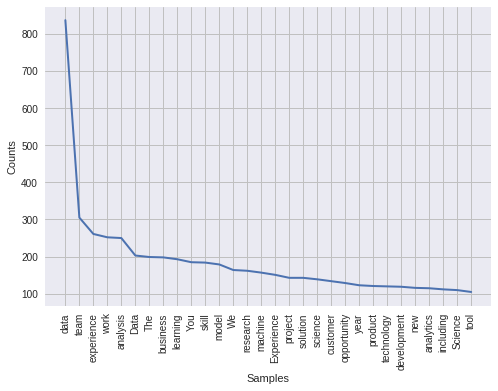

In [83]:
import matplotlib.pyplot as plt
fdist = FreqDist([inner for outer in df2["Job Description"].values for inner in outer])
fdist.plot(30, cumulative=False)
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=20)
bag_of_words = tfidf.fit_transform([" ".join(v) for v in df2["Job Description"].values])

df_vec = pd.DataFrame(bag_of_words.toarray(), columns=tfidf.get_feature_names())
df_vec.head()

,ability,analysis,business,data,experience,learning,machine,model,opportunity,project,research,science,scientist,skill,solution,team,the,we,work,you
0,0.000000,0.228128,0.244488,0.000000,0.178190,0.000000,0.000000,0.268110,0.228128,0.265319,0.000000,0.380542,0.000000,0.645743,0.000000,0.201349,0.244488,0.000000,0.000000,0.000000
1,0.070440,0.070440,0.075492,0.440166,0.220083,0.139512,0.073267,0.248357,0.070440,0.245772,0.081924,0.235004,0.000000,0.132926,0.000000,0.186515,0.075492,0.295994,0.114240,0.607913
2,0.185542,0.278313,0.000000,0.362317,0.072463,0.459352,0.482474,0.000000,0.092771,0.107896,0.431582,0.154753,0.088379,0.087533,0.104597,0.000000,0.000000,0.000000,0.225685,0.000000
3,0.216209,0.000000,0.115857,0.844403,0.168881,0.107055,0.112444,0.000000,0.108104,0.000000,0.125729,0.090165,0.308961,0.000000,0.000000,0.095415,0.115857,0.113566,0.087662,0.000000
4,0.000000,0.143622,0.115442,0.532872,0.308505,0.213342,0.186734,0.000000,0.107717,0.292315,0.334075,0.089842,0.136824,0.135514,0.323862,0.221836,0.000000,0.037719,0.174696,0.258228


## Stretch Goals

 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.